In [6]:
import numpy as np
import pybbtd.covll1 as covll1
import pybbtd as pybbtd
from pybbtd.visualization import draw_metrics

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# Create Cov-LL1 model
R = 1
L1 = 5
L2 = 3

# Define spatial dimensions N1 and N2, and covariance dimension (N3 x N3), which gives N3^2 for Cov-LL1
N1, N2, N3 = 15, 15, 3
dims = (N1, N2, N3**2)

X = covll1.CovLL1(dims, R=R, L1=L1, L2=L2, block_mode="LL1")

Sufficient condition for uniqueness satisfied
Cov-LL1 tensor initialized with dimensions (15, 15, 9) on LL1 mode.


In [47]:
# Create ground truth tensor
[A0, B0, C0], T0 = X.generate_covll1_tensor()

In [48]:
covll1.validate_cov_matrices(T0)

All pixels carry valid covariance matrices.


Reached absolute tolerance threshold. Exiting.


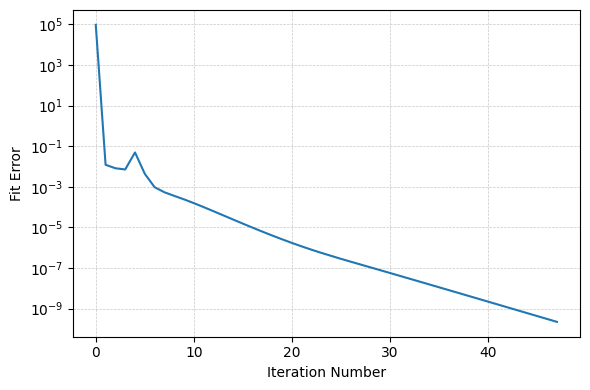

In [101]:
np.random.seed(15)

# CovLL1_model, T, init="random", max_iter=1000, rho=1, max_admm=1, rel_tol=10**-10, abs_tol=10**-10, admm_tol=10**-8

X.fit(
    data=T0,
    algorithm="ADMM",
    init="kmeans",
    max_iter=100000,
    rho=1,
    max_admm=2,
    rel_tol=10**-12,
    abs_tol=10**-12,
    admm_tol=10**-8,
)

draw_metrics.plot_error(X.fit_error)